In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
#import seaborn as seabornInstance
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
#from scipy.interpolate import CubicSpline
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

In [4]:
dataset = pd.read_csv("co2emission.csv")
dataset

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


In [5]:
new_data = dataset[["country", "year", "co2_per_capita"]]
new_data.head()
new_data.tail()

,country,year,co2_per_capita
50593,Zimbabwe,2017,0.651
50594,Zimbabwe,2018,0.784
50595,Zimbabwe,2019,0.724
50596,Zimbabwe,2020,0.677
50597,Zimbabwe,2021,0.706


In [6]:
europe = new_data[new_data["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

,country,year,co2_per_capita
788,Albania,1850,NaN
789,Albania,1851,NaN
790,Albania,1852,NaN
791,Albania,1853,NaN
792,Albania,1854,NaN


In [7]:
print(europe.isnull())

       country   year  co2_per_capita
788      False  False            True
789      False  False            True
790      False  False            True
791      False  False            True
792      False  False            True
...        ...    ...             ...
47932    False  False           False
47933    False  False           False
47934    False  False           False
47935    False  False           False
47936    False  False           False

[8708 rows x 3 columns]


In [8]:
missing_counts = europe.isnull().sum()
print(missing_counts)

country              0
year                 0
co2_per_capita    1328
dtype: int64


In [9]:
europe.info()
europe.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 788 to 47936
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         8708 non-null   object 
 1   year            8708 non-null   int64  
 2   co2_per_capita  7380 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.1+ KB


,country,year,co2_per_capita
47932,United Kingdom,2017,5.863
47933,United Kingdom,2018,5.716
47934,United Kingdom,2019,5.462
47935,United Kingdom,2020,4.865
47936,United Kingdom,2021,5.154


In [10]:
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

,country,year,co2_per_capita
838,Albania,1900,NaN
839,Albania,1901,NaN
840,Albania,1902,NaN
841,Albania,1903,NaN
842,Albania,1904,NaN
...,...,...,...
47932,United Kingdom,2017,5.863
47933,United Kingdom,2018,5.716
47934,United Kingdom,2019,5.462
47935,United Kingdom,2020,4.865


In [11]:
grouped = europe_data.groupby(['country'])
mean_values = grouped.mean()
europe_data.loc[:,'co2_per_capita'] = grouped['co2_per_capita'].transform(lambda x: x.fillna(x.mean()))
europe_data

,country,year,co2_per_capita
838,Albania,1900,1.232888
839,Albania,1901,1.232888
840,Albania,1902,1.232888
841,Albania,1903,1.232888
842,Albania,1904,1.232888
...,...,...,...
47932,United Kingdom,2017,5.863000
47933,United Kingdom,2018,5.716000
47934,United Kingdom,2019,5.462000
47935,United Kingdom,2020,4.865000


In [12]:
# Group by 'year' and calculate the mean of 'co2_per_capita' within each year group
mean_by_year = europe_data.groupby('year')['co2_per_capita'].mean()

# Display the first 10 means per year
mean_by_year.head(10)


year
1900    2.395832
1901    2.375619
1902    2.365278
1903    2.400300
1904    2.419300
1905    2.426151
1906    2.514151
1907    2.627321
1908    2.707172
1909    2.663959
Name: co2_per_capita, dtype: float64

In [13]:
# Convert Series to DataFrame
df = mean_by_year.reset_index()

# Display the DataFrame
df


,year,co2_per_capita
0,1900,2.395832
1,1901,2.375619
2,1902,2.365278
3,1903,2.400300
4,1904,2.419300
...,...,...
117,2017,6.501851
118,2018,6.448809
119,2019,6.175596
120,2020,5.677936


In [14]:
# Convert 'year' column to datetime format without considering it as a timestamp
df['year'] = pd.to_datetime(df['year'], format='%Y')

print(df)
print(df.dtypes)

          year  co2_per_capita
0   1900-01-01        2.395832
1   1901-01-01        2.375619
2   1902-01-01        2.365278
3   1903-01-01        2.400300
4   1904-01-01        2.419300
..         ...             ...
117 2017-01-01        6.501851
118 2018-01-01        6.448809
119 2019-01-01        6.175596
120 2020-01-01        5.677936
121 2021-01-01        5.756660

[122 rows x 2 columns]
year              datetime64[ns]
co2_per_capita           float64
dtype: object


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            122 non-null    datetime64[ns]
 1   co2_per_capita  122 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [16]:
# plotds is method to plot time series, ACF and PACF
from statsmodels.graphics.tsaplots import plot_pacf

def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

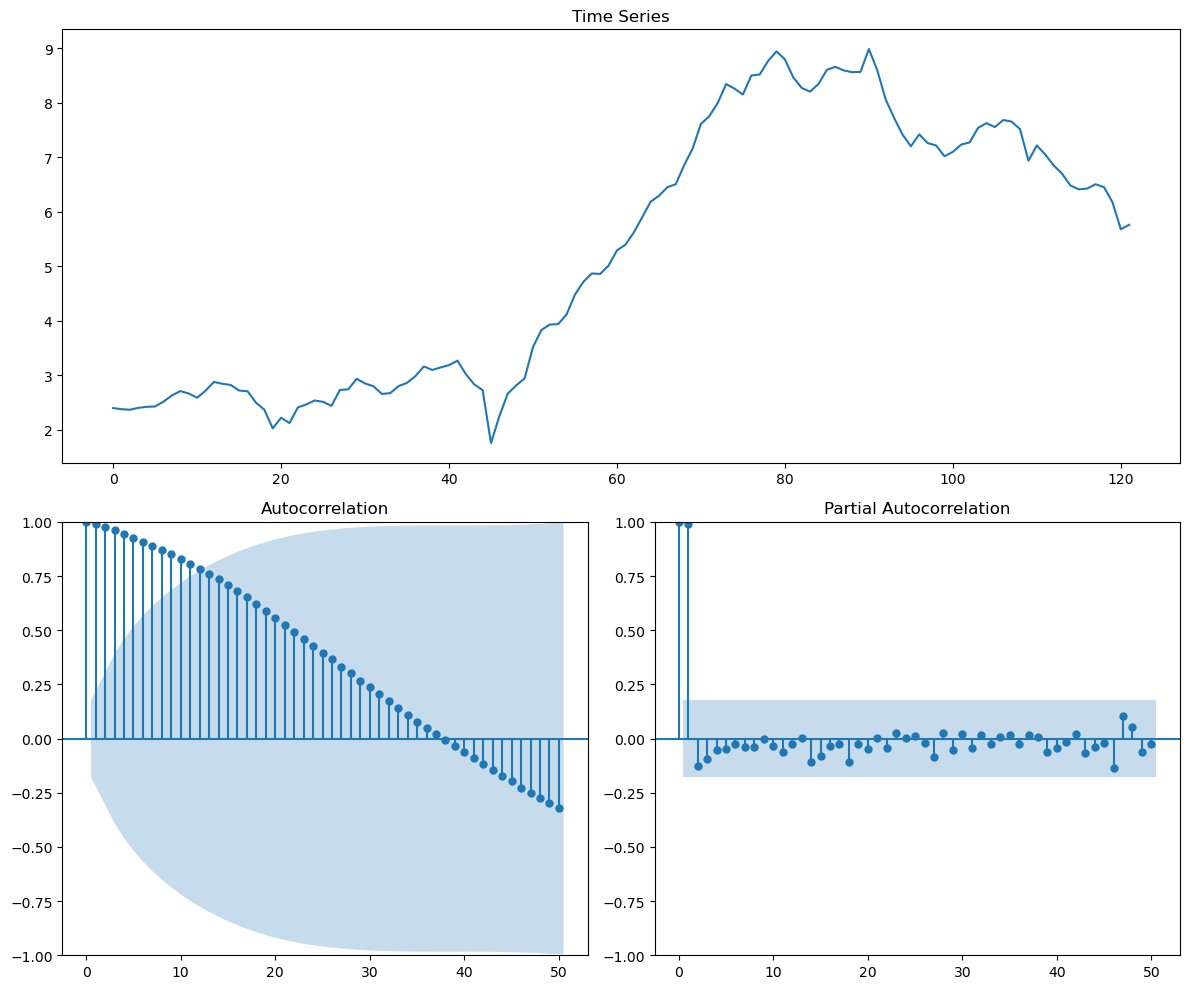

In [17]:
# Display plot of close column and Date index
plotds(df['co2_per_capita'], nlag = 100)

#testing the value for 'd'
result = adfuller(df.co2_per_capita.dropna())
print('p-value: ', result[1])

result = adfuller(df.co2_per_capita.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.co2_per_capita.diff().diff().dropna())
print('p-value: ', result[1])

#d=1
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.co2_per_capita); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.co2_per_capita.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.co2_per_capita.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#finding p


#partial autocorrelation
plot_pacf(df.co2_per_capita.diff().dropna())

#finding q

plot_acf(df.co2_per_capita.diff().dropna())
plt.show()


In [16]:
## d = 1
## p = 1
## q = 1

In [18]:
adftest = adfuller(df['co2_per_capita'])
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -1.1838322326020232
P-Value: 0.6805117240822011
Number of lags: 1
Number of observations: 120
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [89]:
# Apply logarithmic transformation
#mean_by_year_df['co2_per_capita_logs'] = np.log(mean_by_year_df['co2_per_capita'])

# Calculate first differences
df["co2_per_capita_diff"] = df['co2_per_capita'].diff()

# Convert to growth rates (multiply by 100)
#mean_by_year_df['co2_per_capita_growth'] = mean_by_year_df['co2_per_capita_diff'] * 100

# Display the transformed dataset
df.head(10)


,year,co2_per_capita,Arima,co2_per_capita_diff
0,1900-01-01,2.395832,0.000000,NaN
1,1901-01-01,2.375619,2.395832,-0.020213
2,1902-01-01,2.365278,2.370786,-0.010340
3,1903-01-01,2.400300,2.360041,0.035021
4,1904-01-01,2.419300,2.403301,0.019000
5,1905-01-01,2.426151,2.424714,0.006851
6,1906-01-01,2.514151,2.431025,0.088000
7,1907-01-01,2.627321,2.532725,0.113170
8,1908-01-01,2.707172,2.659511,0.079851
9,1909-01-01,2.663959,2.742866,-0.043213


#Differentiation
co2_per_capita_diff = df['co2_per_capita_diff'].dropna()

# Augmented Dicky-Fuller test
adftest = adfuller(co2_per_capita_diff, autolag='AIC', regression='c')
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary")

In [63]:
from statsmodels.tsa.arima.model import ARIMA

In [82]:
# A nested loop is written to calculate the AIC values
# The lowest AIC the better

aic_values=[]
for d in range(0,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['co2_per_capita'], order=(ari,d,maj))
                arima_obj_fit = arima_obj.fit()
                aic_values.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aic_values)

[[0, 0, 0, 562.4703268416657], [0, 0, 1, 412.597358713153], [0, 0, 2, 294.8479725997669], [1, 0, 0, -3.6224074584248953], [1, 0, 1, -9.31018275542251], [1, 0, 2, -9.425985832735314], [2, 0, 0, -11.327132836974236], [2, 0, 1, -15.82331097021336], [2, 0, 2, -16.685343093290033], [0, 1, 0, -11.40711681397146], [0, 1, 1, -17.01855697318674], [0, 1, 2, -17.061730745017098], [1, 1, 0, -18.949477465576702], [1, 1, 1, -20.100000182579876], [1, 1, 2, -19.080918603267854], [2, 1, 0, -18.504686402884623], [2, 1, 1, -19.160819668242375], [2, 1, 2, -17.19444202794984], [0, 2, 0, 33.981120904711645], [0, 2, 1, -16.822927387597215], [0, 2, 2, -16.587410474433923], [1, 2, 0, 10.719914301381735], [1, 2, 1, -16.72995213919986], [1, 2, 2, -14.814095508034072], [2, 2, 0, 2.8059473597901956], [2, 2, 1, -14.813692217409134], [2, 2, 2, -12.841920969104411]]


In [ ]:
import itertools


# Define the range of values for p and q
p_range = range(0, 10)  # Example range for p
d_range = range(0, 10)  # Example range for q
q_range = range(0, 10)  # Example range for q

# Create a list of all possible parameter combinations
param_grid = list(itertools.product(p_range, d_range, q_range))

# Define a function to fit ARIMA models and calculate AIC
def fit_arima_and_calc_aic(df, order):
    model = ARIMA(df, order=order)
    try:
        fitted_model = model.fit()
        aic = fitted_model.aic
        if aic > 0:  # Only consider positive AIC values
            return aic
        else:
            return np.nan
    except:
        return np.nan  # Handle cases where the model fitting fails

# Calculate AIC for all parameter combinations
aic_values = []
for param in param_grid:
    p, d, q = param
    aic = fit_arima_and_calc_aic(df['co2_per_capita'], order=(p, d, q)) 
    aic_values.append((p, d, q, aic))

# Convert results to DataFrame for easier manipulation
aic_df = pd.DataFrame(aic_values, columns=['p', 'd', 'q', 'AIC'])

# Find the parameters corresponding to the lowest AIC
best_params = aic_df.loc[aic_df['AIC'].idxmin()]

print("Best Parameters (p, d, q):", (best_params['p'], best_params['d'], best_params['q']))
print("Lowest AIC:", best_params['AIC'])

In [85]:
arima_model = ARIMA(df['co2_per_capita'], order = (4, 0, 6))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:         co2_per_capita   No. Observations:                  122
Model:                 ARIMA(4, 0, 6)   Log Likelihood                  11.906
Date:                Sat, 04 May 2024   AIC                              0.187
Time:                        11:53:09   BIC                             33.835
Sample:                             0   HQIC                            13.854
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4332      3.653      1.213      0.225      -2.727      11.594
ar.L1         -0.2857      1.399     -0.204      0.838      -3.027       2.455
ar.L2         -0.0530      0.825     -0.064      0.9

In [86]:
#data = df.dropna()
#data
df

,year,co2_per_capita,Arima
0,1900-01-01,2.395832,0.000000
1,1901-01-01,2.375619,2.395832
2,1902-01-01,2.365278,2.370786
3,1903-01-01,2.400300,2.360041
4,1904-01-01,2.419300,2.403301
...,...,...,...
117,2017-01-01,6.501851,6.377869
118,2018-01-01,6.448809,6.484417
119,2019-01-01,6.175596,6.427799
120,2020-01-01,5.677936,6.114269


In [87]:
# Generate forecasts using the fitted model
forecast = model.forecast(steps=80)  # Forecast 50 steps ahead

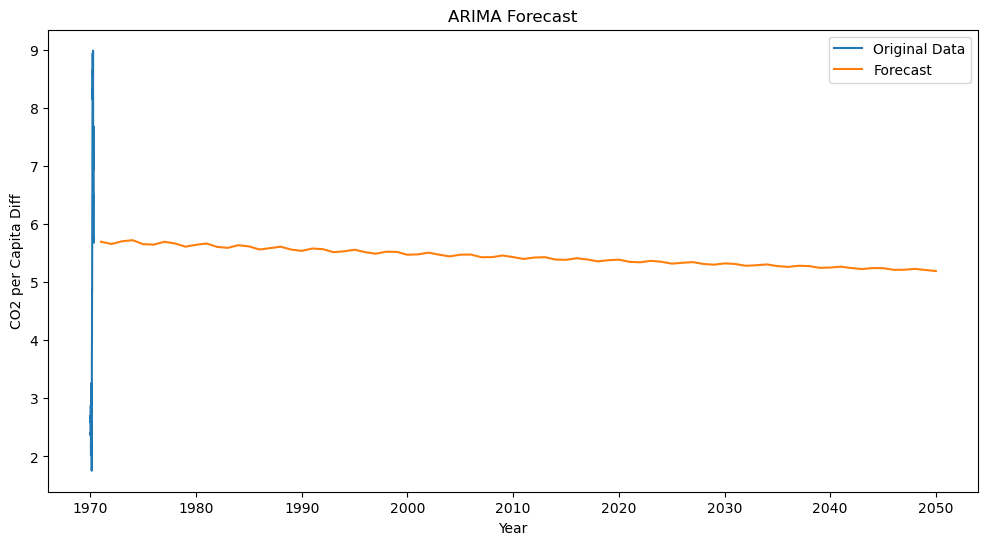

In [88]:

# Plot the original 'co2_per_capita_diff' data alongside the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['co2_per_capita'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=80, freq='Y'), forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('CO2 per Capita Diff')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [73]:
pred = model.fittedvalues
df['Arima'] = pred
df

,year,co2_per_capita,Arima
0,1900-01-01,2.395832,0.000000
1,1901-01-01,2.375619,2.395832
2,1902-01-01,2.365278,2.370786
3,1903-01-01,2.400300,2.360041
4,1904-01-01,2.419300,2.403301
...,...,...,...
117,2017-01-01,6.501851,6.377869
118,2018-01-01,6.448809,6.484417
119,2019-01-01,6.175596,6.427799
120,2020-01-01,5.677936,6.114269


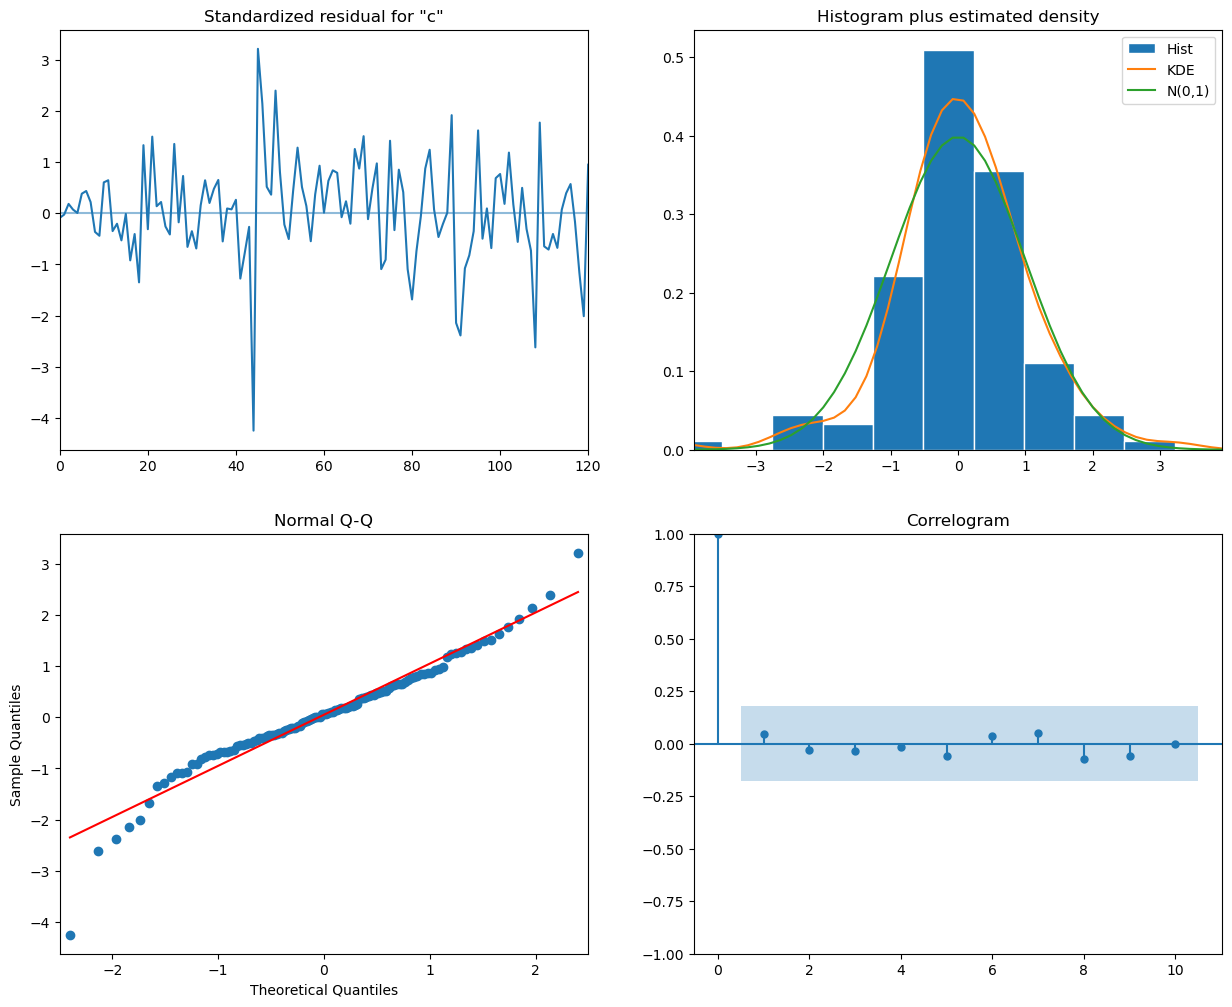

In [74]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

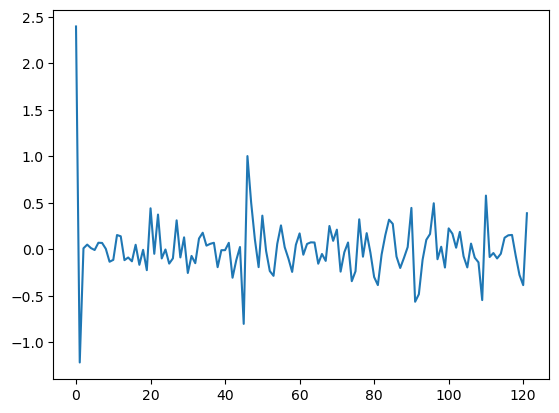

0      2.395832
1     -1.218129
2      0.009872
3      0.049706
4      0.012428
         ...   
117    0.153635
118   -0.071374
119   -0.276452
120   -0.386334
121    0.386894
Length: 122, dtype: float64


In [36]:
#import statsmodels.api as sm
# line plot of residuals
residuals = pd.Series(model.resid)
residuals.plot()
pyplot.show();
print(residuals)

In [37]:
import statsmodels.api as sm

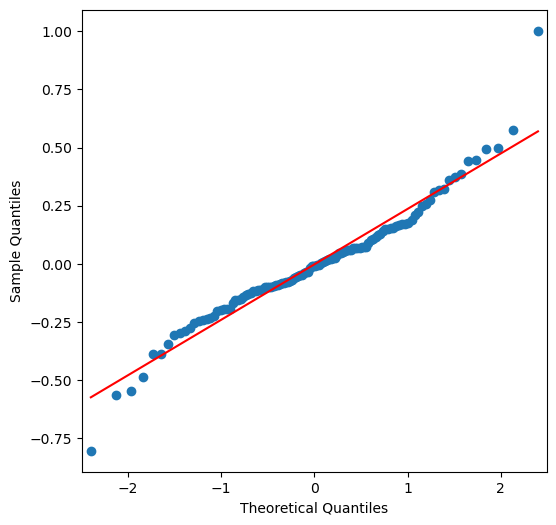

In [38]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
fig, ax = plt.subplots(figsize=(6, 6))

# Remove the first and last point from residuals
residuals = model.resid[2:]

sm.qqplot(residuals, line='s', ax=ax)
plt.show()

In [26]:
print(df['year'], df['co2_per_capita'], df['Arima'])

0     1900-01-01
1     1901-01-01
2     1902-01-01
3     1903-01-01
4     1904-01-01
         ...    
117   2017-01-01
118   2018-01-01
119   2019-01-01
120   2020-01-01
121   2021-01-01
Name: year, Length: 122, dtype: datetime64[ns] 0      2.395832
1      2.375619
2      2.365278
3      2.400300
4      2.419300
         ...   
117    6.501851
118    6.448809
119    6.175596
120    5.677936
121    5.756660
Name: co2_per_capita, Length: 122, dtype: float64 0      0.000000
1      2.395832
2      2.370161
3      2.360434
4      2.405737
         ...   
117    6.488124
118    6.464100
119    6.407893
120    6.097060
121    5.536051
Name: Arima, Length: 122, dtype: float64


In [27]:
df.head()

,year,co2_per_capita,Arima
0,1900-01-01,2.395832,0.000000
1,1901-01-01,2.375619,2.395832
2,1902-01-01,2.365278,2.370161
3,1903-01-01,2.400300,2.360434
4,1904-01-01,2.419300,2.405737


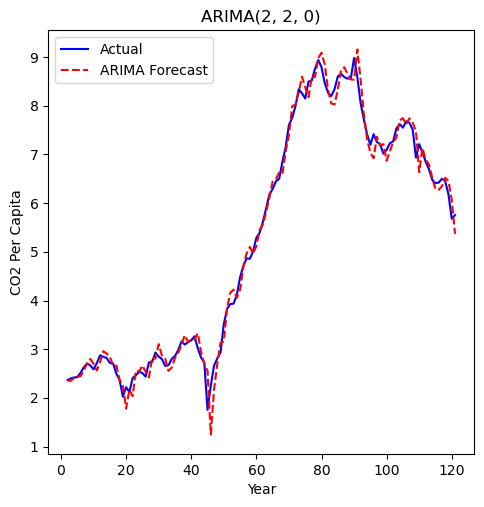

In [39]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
df['co2_per_capita'].iloc[2:].plot(color='b', linestyle='-', ax=axarr, label='Actual')
df['Arima'].iloc[2:].plot(color='r', linestyle='--', ax=axarr, label='ARIMA Forecast')
axarr.set_title('ARIMA(2, 1, 0)')
axarr.set_xlabel('Year')
axarr.set_ylabel('CO2 Per Capita')
axarr.legend()  # Add legend

plt.show()

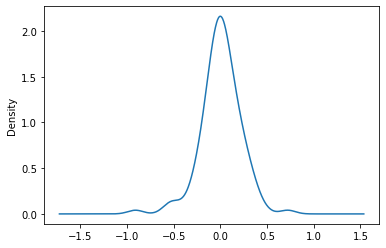

In [29]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [30]:
# summary stats of residuals
print(residuals.describe())

count    120.000000
mean       0.005898
std        0.213538
min       -0.907578
25%       -0.097362
50%        0.013066
75%        0.127136
max        0.721003
dtype: float64


#train the model on the data and perform a forecast
forecast = model.get_forecast(steps = 10)

model['forecast']=model.predict(dynamic=True)
model[['co2_per_capita','forecast']].plot()

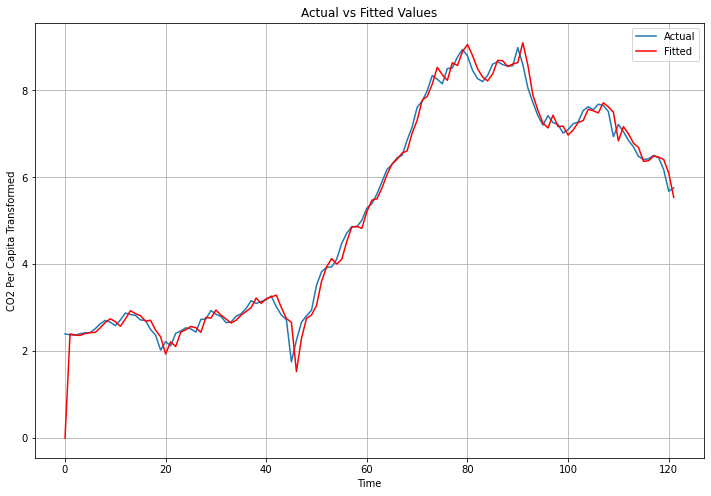

In [31]:
# Plot actual vs fitted values
plt.figure(figsize=(12, 8))
plt.plot(df.co2_per_capita, label='Actual')
plt.plot(model.fittedvalues, color='red', label='Fitted')
plt.title('Actual vs Fitted Values')
plt.xlabel('Time')
plt.ylabel('CO2 Per Capita Transformed')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
X = df.co2_per_capita.values

size = int(len(X) * 0.50)

train = X[0:size]
test = X[size:]

history = [x for x in train]

predictions = list()

In [56]:
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

In [57]:
def inverse_difference(history, prediction, interval = 1):
    return prediction + history[-interval]

In [58]:
# Walk-forward
for t in range(len(test)):
    
    #difference data
    years = 50
    diff = difference(history, years)
    
    #creates arima model with history data
    arima_model = ARIMA(diff, order = (1, 1, 2))
    #trains the arima model
    model = arima_model.fit()
    
    #receives predction by the model
    prediction_value = model.forecast()[0]
    
    prediction_value = inverse_difference(history, prediction_value, years)
    
    predictions.append(prediction_value)
    
    real_value = test[t]
    
    history.append(real_value)
    
    print('Predicted value=%.3f, Expected value=%3.f ' % (prediction_value, real_value))

Predicted value=5.639, Expected value=  5 
Predicted value=5.514, Expected value=  6 
Predicted value=5.762, Expected value=  6 
Predicted value=6.124, Expected value=  6 
Predicted value=6.275, Expected value=  6 
Predicted value=6.444, Expected value=  6 
Predicted value=6.396, Expected value=  7 
Predicted value=6.634, Expected value=  7 
Predicted value=6.894, Expected value=  7 
Predicted value=7.844, Expected value=  8 
Predicted value=7.537, Expected value=  8 
Predicted value=8.456, Expected value=  8 
Predicted value=8.058, Expected value=  8 
Predicted value=8.710, Expected value=  8 
Predicted value=8.300, Expected value=  8 
Predicted value=8.204, Expected value=  8 
Predicted value=9.076, Expected value=  9 
Predicted value=8.569, Expected value=  9 
Predicted value=9.131, Expected value=  9 
Predicted value=8.915, Expected value=  9 
Predicted value=8.772, Expected value=  8 
Predicted value=8.287, Expected value=  8 
Predicted value=8.220, Expected value=  8 
Predicted v

In [59]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.296


In [60]:
# Verifique o número de amostras em cada conjunto de dados
print("Número de amostras no conjunto de dados 1:", train.shape[0])
print("Número de amostras no conjunto de dados 2:", test.shape[0])

Número de amostras no conjunto de dados 1: 61
Número de amostras no conjunto de dados 2: 61


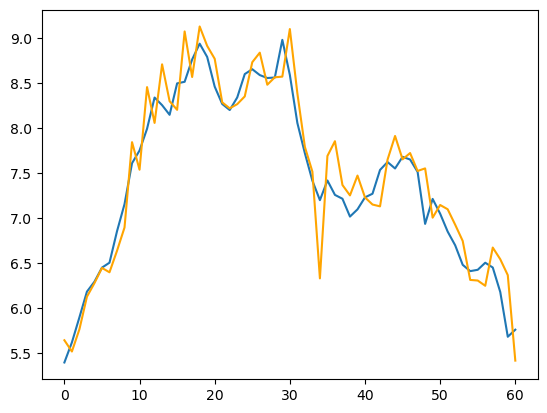

In [61]:
pyplot.plot(test)
pyplot.plot(predictions, color="orange")
pyplot.show()